<a href="https://colab.research.google.com/github/Tomas-Ausensi/Entregables_MAT281/blob/master/docs/labs/lab_8_tomas_ausensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1ZAicRye9Ixj7jijCwNhU8Fhf6Rmjp2Z7" width = "200" align="center"/>

El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

Lo primero es ver los distintos tipos de datos que se tienen en el dataframe mediante `.info()`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  36791 non-null  int64  
 1   desplazamiento        36789 non-null  float64
 2   cilindros             36788 non-null  float64
 3   co2                   36791 non-null  float64
 4   clase_tipo            36791 non-null  object 
 5   traccion_tipo         36791 non-null  object 
 6   transmision_tipo      36791 non-null  object 
 7   combustible_tipo      36791 non-null  object 
 8   tamano_motor_tipo     36789 non-null  object 
 9   consumo_tipo          36791 non-null  object 
 10  co2_tipo              36791 non-null  object 
 11  consumo_litros_milla  36791 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 3.4+ MB


Luego, una pequeña corroboración de los datos nulos que se tienen por columna mediante porcentajes

In [4]:
nan_percentage = (df.isna().sum() / len(df)) *100
nan_percentage

year                    0.000000
desplazamiento          0.005436
cilindros               0.008154
co2                     0.000000
clase_tipo              0.000000
traccion_tipo           0.000000
transmision_tipo        0.000000
combustible_tipo        0.000000
tamano_motor_tipo       0.005436
consumo_tipo            0.000000
co2_tipo                0.000000
consumo_litros_milla    0.000000
dtype: float64

Se definen las columnas numéricas y categóricas

In [5]:
categorical_cols = [column for column in df.columns
                    if df[column].dtype == 'object']

numerical_cols = [column for column in df.columns
                  if df[column].dtype in ['int64', 'float64']]

Se rellenan los datos nulos con la media

In [6]:
df2 = df.copy()
df_numeric = df2[numerical_cols]

for col in numerical_cols:
  df_numeric[col].fillna(value = df_numeric[col].mean(), inplace = True)


<ipython-input-6-e29b87009373>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[col].fillna(value = df_numeric[col].mean(), inplace = True)


Se pasa el dataframe numérico por el scaler

In [7]:
scaler = MinMaxScaler()
df_numeric_proc = scaler.fit_transform(df_numeric)

feature_names = scaler.get_feature_names_out()
numerical = pd.DataFrame(df_numeric_proc, columns = feature_names)

Ahora, se procede con los datos categóricos: se usa `pd.get_dummies()` para obtener columnas [0,1] para cada valor de la variable.

In [8]:
df_categorical = df2[categorical_cols]
categorical = pd.get_dummies(df_categorical)
categorical


,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


Finalmente, se concatenan ambos dataframes

In [9]:
df_procesado = pd.concat([numerical, categorical], axis = 1)
df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


Se corrobora que no queden datos nulos.

In [10]:
nan_percentage = (df_procesado.isna().sum() / len(df_procesado)) *100
nan_percentage

year                                           0.0
desplazamiento                                 0.0
cilindros                                      0.0
co2                                            0.0
consumo_litros_milla                           0.0
clase_tipo_Camionetas                          0.0
clase_tipo_Coche Familiar                      0.0
clase_tipo_Coches Grandes                      0.0
clase_tipo_Coches Medianos                     0.0
clase_tipo_Coches pequeños                     0.0
clase_tipo_Deportivos                          0.0
clase_tipo_Furgoneta                           0.0
clase_tipo_Vehículos Especiales                0.0
traccion_tipo_cuatro                           0.0
traccion_tipo_dos                              0.0
transmision_tipo_Automatica                    0.0
transmision_tipo_Manual                        0.0
combustible_tipo_Hibrido                       0.0
combustible_tipo_Normal                        0.0
combustible_tipo_Otros tipos de

### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

Se entrena KMeans con 8 clusters sobre el dataframe

In [11]:
kmeans = KMeans(n_clusters = 8, random_state = 42, n_init = 'auto')
kmeans.fit(df_procesado.values)

KMeans(n_init='auto', random_state=42)

Se obtiene la etiqueta de cada dato y los centroides de cada cluster. Sin embargo, debido a la cantidad de variables, se pierde la interpretabilidad de la posición de cada centroide.

In [12]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Se genera el dataframe con la información resumida de cada cluster

In [13]:
cluster_summary = pd.DataFrame()

cluster_summary['promedio'] = df_procesado.groupby(labels).mean().mean(axis=1)

for column in numerical_cols:
  cluster_summary[f'moda de {column}']= df_procesado.groupby(labels)[column].apply(lambda x: x.mode().iloc[0])

In [14]:
cluster_summary

,promedio,moda de year,moda de desplazamiento,moda de cilindros,moda de co2,moda de consumo_litros_milla
0,0.260150,0.000000,0.564103,0.428571,0.454199,0.393464
1,0.236214,0.823529,0.179487,0.142857,0.317749,0.241830
2,0.246832,0.617647,0.307692,0.285714,0.374603,0.281734
3,0.236141,0.970588,0.230769,0.142857,0.275108,0.194444
4,0.260145,0.558824,0.653846,0.428571,0.454199,0.393464
5,0.239923,0.000000,0.307692,0.285714,0.374603,0.305011
6,0.227165,0.970588,0.179487,0.142857,0.275108,0.181176
7,0.250228,0.029412,0.474359,0.285714,0.424351,0.331027


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [15]:
sequence = [5,10,20,30,50,75,100,200,300]
kmeans_list = [KMeans(n_clusters = i, n_init=10) for i in sequence]
score = [kmeans_list[i].fit(df_procesado).inertia_ for i in range(len(kmeans_list))]

df_elbow = pd.DataFrame({'Number of Clusters': sequence, 'Score': score})

df_elbow.head()

,Number of Clusters,Score
0,5,102310.085717
1,10,83571.748882
2,20,66419.431587
3,30,56420.065133
4,50,44737.941752


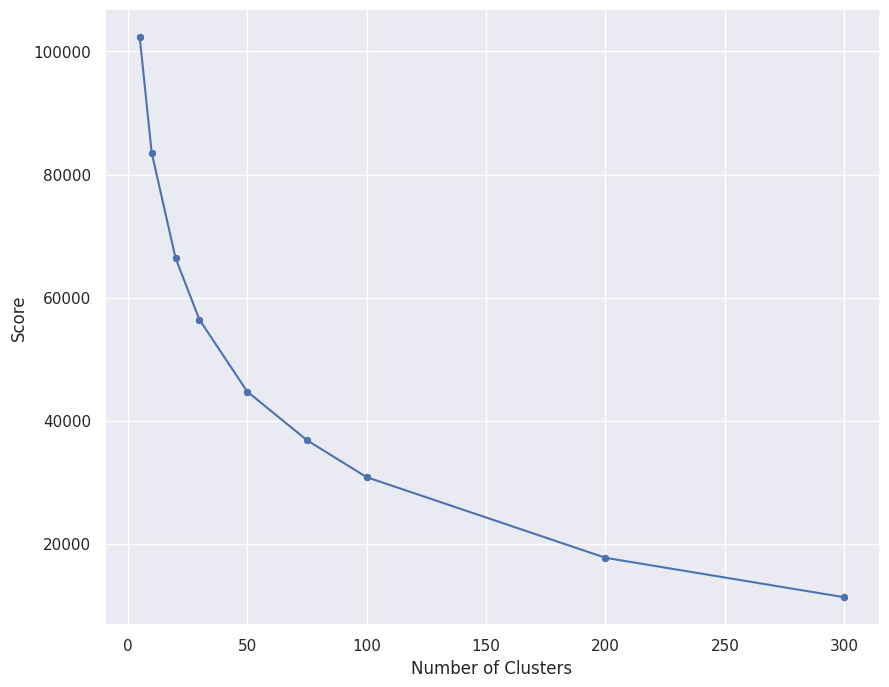

In [16]:
fig, axes = plt.subplots(figsize = (10,8))

sns.lineplot(
    data = df_elbow,
    x = 'Number of Clusters',
    y = 'Score'
)
sns.scatterplot(
    data = df_elbow,
    x= 'Number of Clusters',
    y = 'Score'
)
plt.show()

Como se puede apreciar, el último valor es el que *parece* ser el punto de quiebre, punto óptimo para la cantidad de clusters. Sin embargo, creo que es apropiado corroborar con mayor precisión esta conclusión, utilizando un mayor número de clusters.

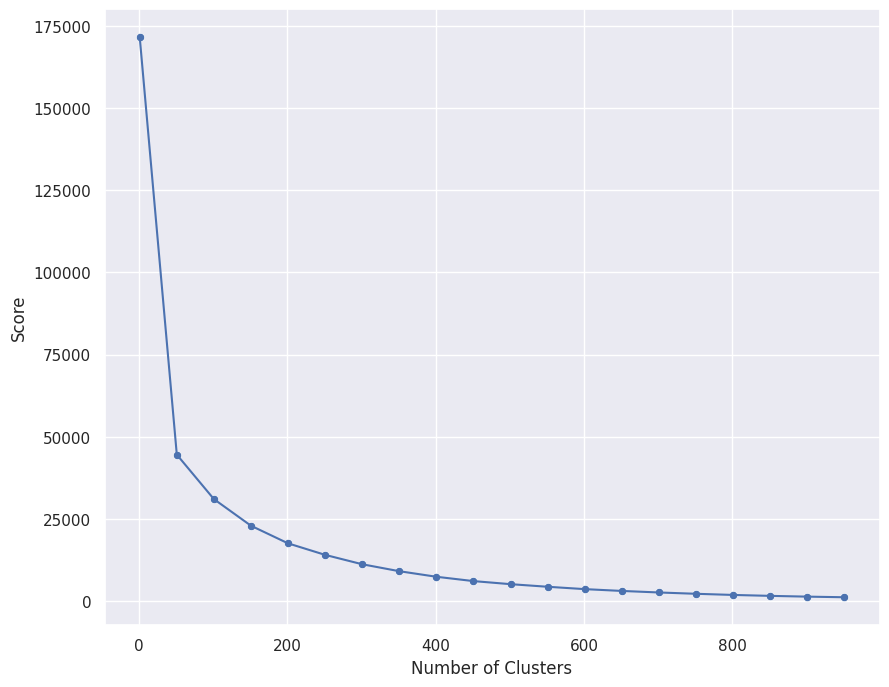

In [17]:
sequence = range(1,1001, 50)
kmeans_list = [KMeans(n_clusters = i, n_init=10) for i in sequence]
score = [kmeans_list[i].fit(df_procesado).inertia_ for i in range(len(kmeans_list))]

df_elbow = pd.DataFrame({'Number of Clusters': sequence, 'Score': score})

fig, axes = plt.subplots(figsize = (10,8))

sns.lineplot(
    data = df_elbow,
    x = 'Number of Clusters',
    y = 'Score'
)
sns.scatterplot(
    data = df_elbow,
    x= 'Number of Clusters',
    y = 'Score'
)
plt.show()

Así, se puede apreciar con mayor seguridad que 300 si puede corresponde a un punto óptimo para la cantidad de clusters.

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

Ahora, resulta interesante dar interpretabilidad a este resultado. Si cada cluster significa una clase, entonces estamos hablando de alrededor de 300 clases para nuestro problema. ¿Tiene sentido? ¿Es un resultado satisfactorio? Aquí es donde el conocimiento experto del tema entra en juego.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [19]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [20]:
X = iris[features]
y = iris[target]

In [21]:
pca = PCA(n_components = 2)
pca_info = pca.fit(X)
pca_results = pca.fit_transform(X)

pca_df = pd.DataFrame(data=pca_results, columns = ['PC1', 'PC2'])
pca_df['species'] = y
pca_df

,PC1,PC2,species
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


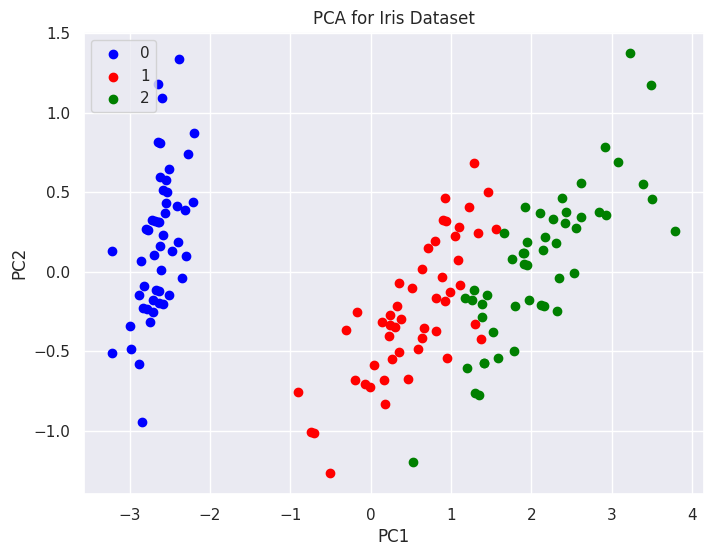

In [22]:
plt.figure(figsize=(8,6))
targets = [0,1,2]
colors = ['blue', 'red', 'green']
for target, color in zip(targets, colors):
  indices = pca_df['species']== target
  plt.scatter(
      pca_df.loc[indices, 'PC1'],
      pca_df.loc[indices, 'PC2'],
      c = color,
      label = target
  )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA for Iris Dataset')
plt.legend()
plt.show()

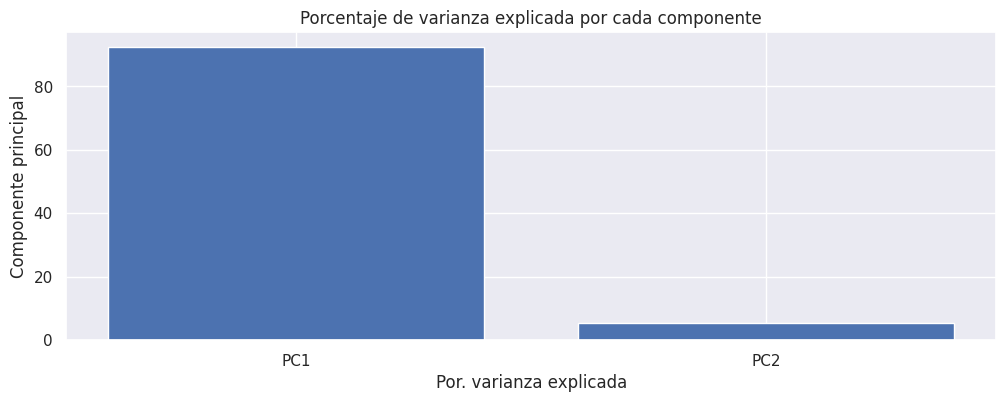

In [23]:
percent_variance = np.round(pca_info.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,3), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(pca_info.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()


De los dos gráficos anteriores, se pueden concluir varias cosas:
- PCA resulta ser un método útil para reducir la dimensionalidad y, al mismo tiempo, conservar la separación de las clases, en este caso.
- La varianza se explica casi totalmente por la primer componente. Sería interesante probar PCA con solo una componente para observar si esto tiene sentido o no.

In [24]:
target = 'species'
tsne = TSNE(n_components = 2, random_state = 42)
tsne_results = tsne.fit_transform(iris[features])

tsne_df = pd.DataFrame(data = tsne_results, columns = ['dim1', 'dim2'])
tsne_df['species'] = y

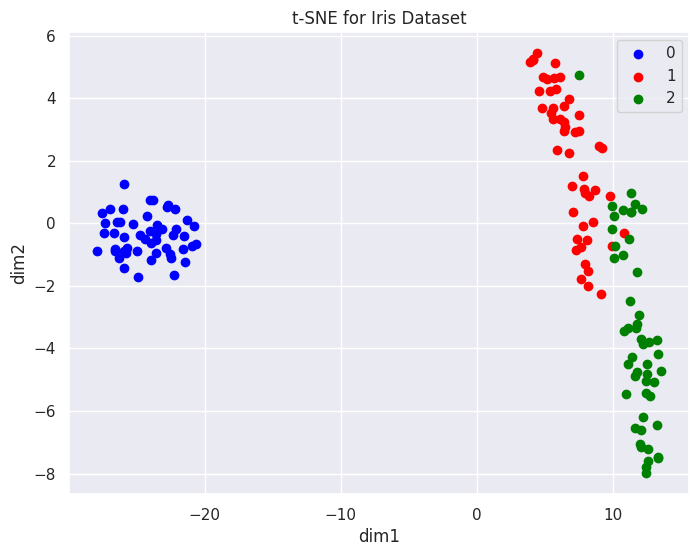

In [25]:
plt.figure(figsize=(8,6))
for target, color in zip(targets, colors):
  indices = tsne_df['species'] == target
  plt.scatter(
      tsne_df.loc[indices, 'dim1'],
      tsne_df.loc[indices, 'dim2'],
      c = color,
      label = target
  )
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('t-SNE for Iris Dataset')
plt.legend()
plt.show()

Como se puede apreciar, la primera clase se separa bastante bien de las demás. Sin embargo, la segunda y la tercera se solapan, algo que no ocurre en PCA. Así, para este caso, tSNE no funciona tan bien como PCA al momento de reducir la dimensionalidad conservando (o mejorando) la separabilidad de las clases.